In [1]:
# seneca
sentence_a = """Life, if well lived, is long enough."""
# steve jobs
sentence_b = """Your time is limited, so don't waste it living someone else's life."""

In [2]:
from typing import List
import re


def tokenize(text: str) -> List[str]:
    # Remove punctuation using regex, keeping words and numbers
    cleaned_text = re.sub(r"[^\w\s]", "", text)
    # Split the cleaned text into words
    tokens = cleaned_text.lower().split()
    return tokens

In [3]:
doc_a = tokenize(sentence_a)
doc_b = tokenize(sentence_b)

print(len(doc_a))
print(len(doc_b))

total_corpus = set(doc_a).union(set(doc_b))

len(total_corpus)

7
12


17

In [4]:
import pandas as pd


word_count_a = dict.fromkeys(total_corpus, 0)
word_count_b = dict.fromkeys(total_corpus, 0)

for word in doc_a:
    word_count_a[word] += 1

for word in doc_b:
    word_count_b[word] += 1

pd.set_option("display.max_rows", None)

freq = pd.DataFrame([word_count_a, word_count_b])
freq.T


,0,1
life,1,1
so,0,1
elses,0,1
if,1,0
waste,0,1
it,0,1
enough,1,0
dont,0,1
lived,1,0
time,0,1


In [5]:
def tf(word_counts: dict, document: list[str]) -> dict:
    """Calculate term frequency of each word in a document."""

    tf_dict = {}
    corpus_count = len(document)

    for word, count in word_counts.items():
        tf_dict[word] = count / float(corpus_count)

    return tf_dict


tf(word_count_a, doc_a)


{'life': 0.14285714285714285,
 'so': 0.0,
 'elses': 0.0,
 'if': 0.14285714285714285,
 'waste': 0.0,
 'it': 0.0,
 'enough': 0.14285714285714285,
 'dont': 0.0,
 'lived': 0.14285714285714285,
 'time': 0.0,
 'someone': 0.0,
 'living': 0.0,
 'long': 0.14285714285714285,
 'is': 0.14285714285714285,
 'limited': 0.0,
 'your': 0.0,
 'well': 0.14285714285714285}

In [6]:
import numpy as np


def idf(word_counts: list[dict[str, int]]) -> dict:
    """Given N documents, no. of documents in which the the term appears for each term"""
    idf_dict = {}
    N = len(word_counts)

    idf_dict = dict.fromkeys(word_counts[0].keys(), 0)

    for word in idf_dict.keys():
        idf_dict[word] = sum(doc[word] > 0 for doc in word_counts)

    for word, df in idf_dict.items():
        idf_dict[word] = np.log10((N + 1.0) / (df + 1.0))

    return idf_dict


idfs = idf([word_count_a, word_count_b])
idfs


{'life': 0.0,
 'so': 0.17609125905568124,
 'elses': 0.17609125905568124,
 'if': 0.17609125905568124,
 'waste': 0.17609125905568124,
 'it': 0.17609125905568124,
 'enough': 0.17609125905568124,
 'dont': 0.17609125905568124,
 'lived': 0.17609125905568124,
 'time': 0.17609125905568124,
 'someone': 0.17609125905568124,
 'living': 0.17609125905568124,
 'long': 0.17609125905568124,
 'is': 0.0,
 'limited': 0.17609125905568124,
 'your': 0.17609125905568124,
 'well': 0.17609125905568124}

In [7]:
def tfidf(doc_elements: dict[str, int], idfs: dict[str, int]) -> dict:
    """TF * IDF per word given a single word in a single document"""

    tfidf_dict = {}

    for word, val in doc_elements.items():
        tfidf_dict[word] = val * idfs[word]

    return tfidf_dict


# calculate term frequency for each document
tf_a = tf(word_count_a, doc_a)
tf_b = tf(word_count_b, doc_b)

# calculate inverse document frequency for each document
tfidf_a = tfidf(tf_a, idfs)
tfidf_b = tfidf(tf_b, idfs)

# return score
document_tfidf = pd.DataFrame([tfidf_a, tfidf_b])
document_tfidf.T


,0,1
life,0.000000,0.000000
so,0.000000,0.014674
elses,0.000000,0.014674
if,0.025156,0.000000
waste,0.000000,0.014674
it,0.000000,0.014674
enough,0.025156,0.000000
dont,0.000000,0.014674
lived,0.025156,0.000000
time,0.000000,0.014674


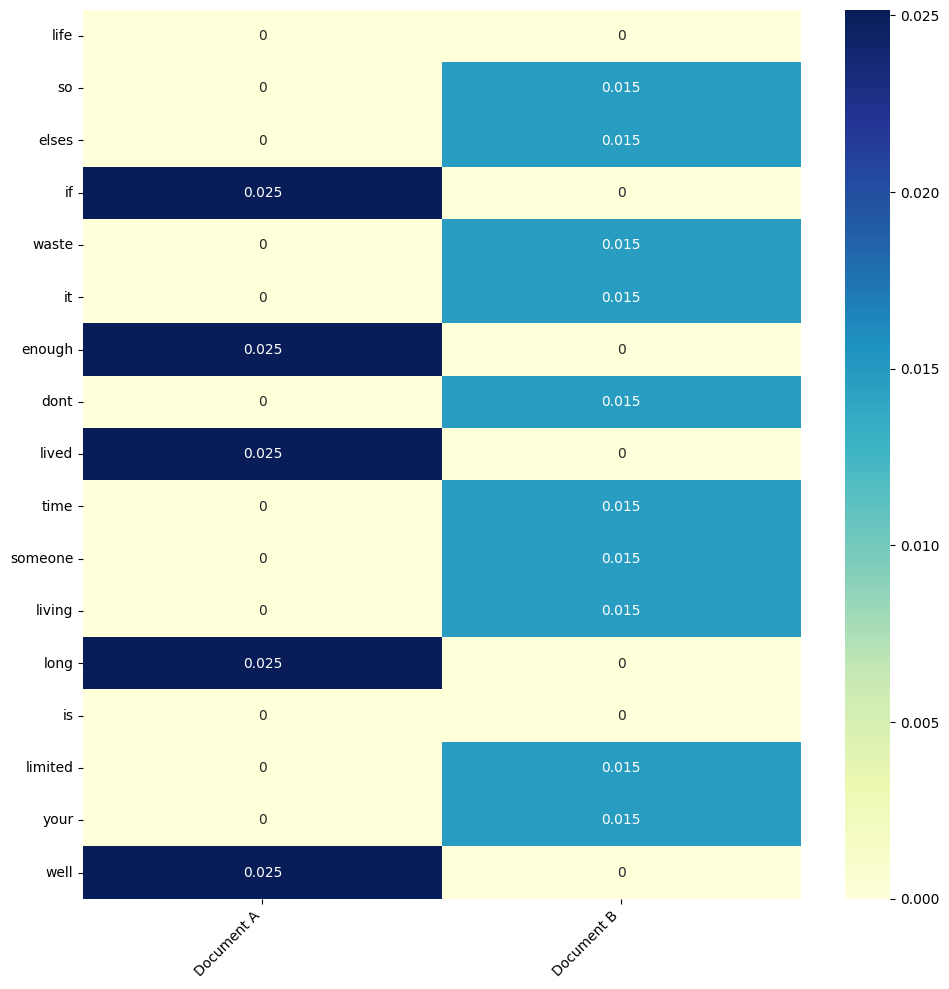

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_tfidf(tfidf_matrix: pd.DataFrame):
    plt.figure(figsize=(10, 10))
    sns.heatmap(tfidf_matrix, annot=True, cmap="YlGnBu")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# Prepare the TF-IDF matrix for visualization and EDA
tfidf_matrix = pd.DataFrame([tfidf_a, tfidf_b], index=["Document A", "Document B"]).T

# Visualize the TF-IDF matrix
visualize_tfidf(tfidf_matrix)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [sentence_a, sentence_b]
titles = ["seneca", "steve_jobs"]

vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(corpus)
dict(zip(vectorizer.get_feature_names_out(), vector.toarray()[0]))

tfidf_df = pd.DataFrame(
    vector.toarray(), index=titles, columns=vectorizer.get_feature_names_out()
)
